<a href="https://colab.research.google.com/github/PetrovES570/PDA_SOL/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2_%D0%A3%D0%BF%D1%80%D0%B0%D0%B6%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_1_%D0%9F%D0%B5%D1%82%D1%80%D0%BE%D0%B2_%D0%95%D0%B2%D0%B3%D0%B5%D0%BD%D0%B8%D0%B9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 2. Источники данных. Извлечение данных
# Упражнение 1


ФИО: Петров Евгений Семенович

Группа: БД-231м

## Задание 2.2.  Выполнить парсинг веб-страниц с помощью Beautiful Soup и Pandas открытых источников данных

### Парсинг

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://smart-lab.ru/q/bonds/order_by_val_to_day/desc/page1/'

In [ ]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [ ]:
print(response)

<Response [200]>


In [ ]:
print(f"Content type: \n\t {response.headers['content-type']}")

Content type: 
	 text/html; charset=utf-8


In [ ]:
from bs4 import BeautifulSoup as bso

In [ ]:
mysoup = bso(response.text, 'html.parser')

In [ ]:
print(mysoup.prettify()[:1000])

<!DOCTYPE html>
<html lang="ru">
 <head>
  <title>
   котировки корпоративных облигаций, Московская биржа
  </title>
  <meta charset="utf-8"/>
  <meta content="telephone=no" name="format-detection"/>
  <link as="font" href="/templates/skin/smart-lab-2023/fonts/Tahoma-short-Bold.woff" rel="preload"/>
  <link as="font" href="/templates/skin/smart-lab-2023/fonts/Tahoma-short-Bold.woff2" rel="preload"/>
  <link as="font" href="/templates/skin/smart-lab-2023/fonts/Tahoma-short.woff" rel="preload"/>
  <link as="font" href="/templates/skin/smart-lab-2023/fonts/Tahoma-short.woff2" rel="preload"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="https://smart-lab.ru/q/bonds/" rel="canonical"/>
  <!-- Global Site Tag (gtag.js) - Google Analytics -->
  <script defer="" src="https://www.googletagmanager.com/gtag/js?id=UA-16537214-3">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
		function gtag(){dataLayer.push(arguments);}
		gtag('js',

In [ ]:
print(mysoup.title)

<title>котировки корпоративных облигаций, Московская биржа</title>


In [ ]:
table_html = mysoup.table.prettify()
print(table_html[:2000])

<table class="_hidden">
 <tbody>
  <tr>
   <th class="trades-table__n">
    №
   </th>
   <th class="trades-table__name trades-table__name--center">
    <a href="/q/bonds/order_by_short_name/asc/">
     Имя
    </a>
   </th>
   <th class="trades-table__chartrow chartrow">
   </th>
   <th>
    <a href="/q/bonds/order_by_mat_years/desc/">
     Лет до
     <br/>
     погаш.
    </a>
   </th>
   <th>
    <a href="/q/bonds/order_by_yield/desc/" title="Доходность облигации к погашению при текущей рыночной цене">
     Доходн
    </a>
   </th>
   <th title="Доходность годового купона относительно номинала">
    <a href="/q/bonds/order_by_year_yield/desc/">
     Год.куп.
     <br/>
     дох.
    </a>
   </th>
   <th title="Доходность купона относительно текущей рыночной цены облигации">
    <a href="/q/bonds/order_by_yield_last/desc/">
     Куп.дох.
     <br/>
     посл.
    </a>
   </th>
   <th>
    <a href="/q/bonds/order_by_sm_rating/desc/">
     Рейтинг
    </a>
   </th>
   <th class="trade

In [ ]:
columns = []  # Список для хранения заголовков столбцов
data = []     # Список для хранения данных строк

# Извлекаем заголовки столбцов из тегов <th> в таблице
for th in mysoup.table.find_all('th'):
    columns.append(th.text)  # Добавляем текст из тега <th> в список заголовков

# Извлекаем данные из строк таблицы из тегов <tr> и <td>
for tr in mysoup.table.find_all('tr')[1:]:  # Начинаем с 1, чтобы пропустить первую строку с заголовками
    row = [td.text for td in tr.find_all('td')]  # Создаем список данных для каждой строки таблицы
    data.append(row)  # Добавляем список данных строки в общий список данных

# Создаем DataFrame, используя заголовки столбцов и данные строк
df = pd.DataFrame(data, columns=columns)

# Выводим первые строки DataFrame
df.head()

,№,Имя,,Лет допогаш.,Доходн,Год.куп.дох.,Куп.дох.посл.,Рейтинг,"Объем, млн руб","Купон, руб","Частота,раз в год","НКД, руб","Дюр-я, лет",Цена,Дата купона,Размещение,Погашение,Оферта,,
0,1,Газпн3P10R,-,3.0,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t0.0%\n\t\t\t\t...,\n\t\t\t\t\t\t\t0.0%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t-\t\t\t\t\t\t,-,787.6,0,12,1.0,-,100.18,29.03.24,28.02.24,12.02.27,-,+,+
1,2,МЕТАЛИНБ04,,5.9,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t14.4%\n\t\t\t\...,\n\t\t\t\t\t\t\t6.5%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t7.4%\n\t\t\t\t...,AAA,316.7,32.66,2,4.1,1.84,87.95,07.08.24,12.02.20,30.01.30,09.02.26,+,+
2,3,RUS-25 EUR,,1.8,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t3.9%\n\t\t\t\t...,\n\t\t\t\t\t\t\t2.9%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t2.9%\n\t\t\t\t...,-,273.0,2875,1.0,68 745.8,-,98.30,04.12.24,04.12.18,04.12.25,-,+,+
3,4,ЧТПЗ 1P3,,0.1,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t16.5%\n\t\t\t\...,\n\t\t\t\t\t\t\t9.7%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t9.7%\n\t\t\t\t...,A,199.8,24.18,4,18.9,0.05,99.68,21.03.24,30.03.17,21.03.24,-,+,+
4,5,СамолетP13,,2.9,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t15.8%\n\t\t\t\...,\n\t\t\t\t\t\t\t14.7%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t14.7%\n\t\t\t\...,A+,194.8,12.12,12,8.5,1.67,100.00,10.03.24,09.02.24,24.01.27,-,+,+


### Обработка данных

Необходимо преобразовать датафрейм. В первую очередь надо вычленить корректные проценты из столбцов "Доходн";  "Год.куп.дох."; "Куп.дох.посп.". Также необходимо преобразовать типы данных и удалить последние 2 столбца, так как они не представляют никакой ценности и являются техническими

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   №                  100 non-null    object
 1   Имя                100 non-null    object
 2                      100 non-null    object
 3   Лет допогаш.       100 non-null    object
 4   Доходн             100 non-null    object
 5   Год.куп.дох.       100 non-null    object
 6   Куп.дох.посл.      100 non-null    object
 7   Рейтинг            100 non-null    object
 8   Объем, млн руб     100 non-null    object
 9   Купон, руб         100 non-null    object
 10  Частота,раз в год  100 non-null    object
 11  НКД, руб           100 non-null    object
 12  Дюр-я, лет         100 non-null    object
 13  Цена               100 non-null    object
 14  Дата купона        100 non-null    object
 15  Размещение         100 non-null    object
 16  Погашение          100 non-null    object
 17

In [ ]:
df.shape

(100, 20)

In [ ]:
df = df.drop(columns = df.columns[-2:])

In [ ]:
df.columns

Index(['№', 'Имя', 'Лет допогаш.', 'Доходн', 'Год.куп.дох.', 'Куп.дох.посл.',
       'Рейтинг', 'Объем, млн руб', 'Купон, руб', 'Частота,раз в год',
       'НКД, руб', 'Дюр-я, лет', 'Цена', 'Дата купона', 'Размещение',
       'Погашение', 'Оферта'],
      dtype='object')

In [ ]:
import re

def percent_preproc(x):
    return pd.to_numeric(re.search( r"\d+\.\d+", x)[0], errors = 'coerce')

In [ ]:
df = df.drop(columns = df.columns[:1])

In [ ]:

df['Куп.дох.посл.'] = df['Куп.дох.посл.'].str.replace('-','0.0')
df['Доходн'] = df['Доходн'].str.replace('-','0.0')
df['Год.куп.дох.'] = df['Год.куп.дох.'].str.replace('-','0.0')

In [ ]:
df['Лет допогаш.'] = pd.to_numeric(df['Лет допогаш.'], errors = 'coerce')
df['Объем, млн руб'] = pd.to_numeric(df['Объем, млн руб'], errors = 'coerce')
df['Купон, руб'] = pd.to_numeric(df['Купон, руб'], errors = 'coerce')
df['НКД, руб'] = pd.to_numeric(df['НКД, руб'], errors = 'coerce')
df['Дюр-я, лет'] = pd.to_numeric(df['Дюр-я, лет'], errors = 'coerce')
df['Цена'] = pd.to_numeric(df['Цена'], errors = 'coerce')
df['Частота,раз в год'] = pd.to_numeric(df['Частота,раз в год'], errors = 'coerce')
df['Дата купона'] = pd.to_datetime(df['Дата купона'], errors = 'coerce')
df['Размещение'] = pd.to_datetime(df['Размещение'], errors = 'coerce')
df['Погашение'] = pd.to_datetime(df['Погашение'], errors = 'coerce')
df['Доходн'] = df['Доходн'].apply(percent_preproc)
df['Год.куп.дох.'] = df['Год.куп.дох.'].apply(percent_preproc)
df['Куп.дох.посл.'] = df['Куп.дох.посл.'].apply(percent_preproc)

In [ ]:
df

,Имя,Лет допогаш.,Доходн,Год.куп.дох.,Куп.дох.посл.,Рейтинг,"Объем, млн руб","Купон, руб","Частота,раз в год","НКД, руб","Дюр-я, лет",Цена,Дата купона,Размещение,Погашение,Оферта
0,Газпн3P10R,3.0,0.0,0.0,0.0,-,787.6,0.00,12.0,1.0,NaN,100.18,2024-03-29,2024-02-28,2027-12-02,-
1,МЕТАЛИНБ04,5.9,14.4,6.5,7.4,AAA,316.7,32.66,2.0,4.1,1.84,87.95,2024-07-08,2020-12-02,2030-01-30,09.02.26
2,RUS-25 EUR,1.8,3.9,2.9,2.9,-,273.0,2875.00,1.0,NaN,NaN,98.30,2024-04-12,2018-04-12,2025-04-12,-
3,ЧТПЗ 1P3,0.1,16.5,9.7,9.7,A,199.8,24.18,4.0,18.9,0.05,99.68,2024-03-21,2017-03-30,2024-03-21,-
4,СамолетP13,2.9,15.8,14.7,14.7,A+,194.8,12.12,12.0,8.5,1.67,100.00,2024-10-03,2024-09-02,2027-01-24,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Боржоми1Р2,3.0,16.1,16.1,15.9,A-,8.2,40.14,4.0,4.4,1.34,101.15,2024-05-21,2024-02-20,2027-02-16,22.08.25
96,ЗавдКЭС1Р5,5.0,19.9,19.0,18.8,BB-,8.2,47.37,4.0,4.2,2.68,101.12,2024-05-23,2024-02-22,2029-02-15,-
97,ТГК-14 1Р1,2.2,15.1,14.0,14.1,BBB+,8.1,34.90,4.0,11.1,1.89,99.47,2024-02-05,2023-04-05,2026-04-30,-
98,Газпн3P11R,3.0,0.0,0.0,0.0,-,8.0,0.00,4.0,0.9,NaN,100.19,2024-05-29,2024-02-28,2027-02-24,-


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Имя                100 non-null    object        
 1   Лет допогаш.       100 non-null    float64       
 2   Доходн             100 non-null    float64       
 3   Год.куп.дох.       100 non-null    float64       
 4   Куп.дох.посл.      100 non-null    float64       
 5   Рейтинг            100 non-null    object        
 6   Объем, млн руб     100 non-null    float64       
 7   Купон, руб         100 non-null    float64       
 8   Частота,раз в год  100 non-null    float64       
 9   НКД, руб           89 non-null     float64       
 10  Дюр-я, лет         91 non-null     float64       
 11  Цена               100 non-null    float64       
 12  Дата купона        99 non-null     datetime64[ns]
 13  Размещение         100 non-null    datetime64[ns]
 14  Погашение  

In [ ]:
df.rename(
    columns = {
        "Доходн": "Доходность, %",
        "Год.куп.дох.": "Год.куп.дох., %",
        "Куп.дох.посл.": "Куп.дох.посл., %",
        "Цена": "Цена, руб."
    },
    inplace = True
)

In [ ]:
df.head()

,Имя,Лет допогаш.,"Доходность, %","Год.куп.дох., %","Куп.дох.посл., %",Рейтинг,"Объем, млн руб","Купон, руб","Частота,раз в год","НКД, руб","Дюр-я, лет","Цена, руб.",Дата купона,Размещение,Погашение,Оферта
0,Газпн3P10R,3.0,0.0,0.0,0.0,-,787.6,0.00,12.0,1.0,NaN,100.18,2024-03-29,2024-02-28,2027-12-02,-
1,МЕТАЛИНБ04,5.9,14.4,6.5,7.4,AAA,316.7,32.66,2.0,4.1,1.84,87.95,2024-07-08,2020-12-02,2030-01-30,09.02.26
2,RUS-25 EUR,1.8,3.9,2.9,2.9,-,273.0,2875.00,1.0,NaN,NaN,98.30,2024-04-12,2018-04-12,2025-04-12,-
3,ЧТПЗ 1P3,0.1,16.5,9.7,9.7,A,199.8,24.18,4.0,18.9,0.05,99.68,2024-03-21,2017-03-30,2024-03-21,-
4,СамолетP13,2.9,15.8,14.7,14.7,A+,194.8,12.12,12.0,8.5,1.67,100.00,2024-10-03,2024-09-02,2027-01-24,-


### Анализ данных

В качестве верхнеуровневой аналитики посмотрим рапределение облигаций по доходности, выведем топ 5 облигаций с самой высокой доходностью, а также посмотрим распределение облигаций по рейтингу

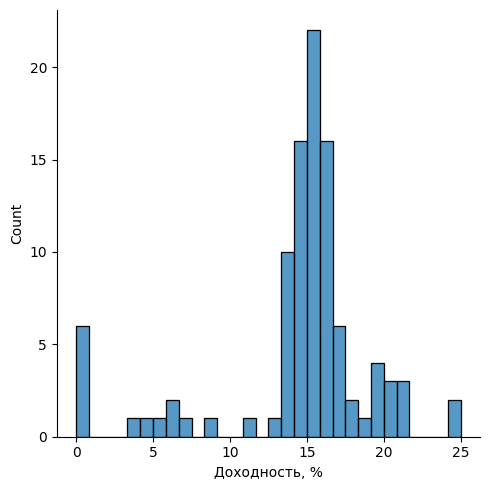

In [ ]:
sns.displot(df['Доходность, %'])

Посмотрим на диапазон 0 до 40 детальнее

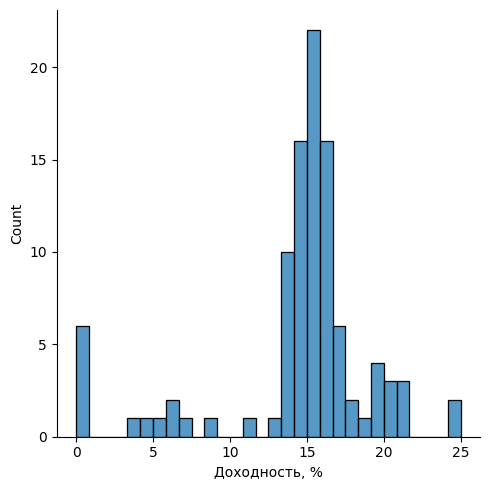

In [ ]:
sns.displot(df[df['Доходность, %'] <= 40]['Доходность, %'])

In [ ]:
print("Топ 5 облигаций с самой высокой доходностью")
df.sort_values(by = "Доходность, %", ascending = False).head(5)

Топ 5 облигаций с самой высокой доходностью


,Имя,Лет допогаш.,"Доходность, %","Год.куп.дох., %","Куп.дох.посл., %",Рейтинг,"Объем, млн руб","Купон, руб","Частота,раз в год","НКД, руб","Дюр-я, лет","Цена, руб.",Дата купона,Размещение,Погашение,Оферта
57,Сегежа2P5R,13.5,25.0,10.7,13.3,BBB,14.3,53.60,2.0,4.4,1.79,80.72,2024-08-15,2022-08-18,2037-07-30,-
30,Сегежа3P2R,13.9,24.3,10.6,12.0,BBB,27.7,26.43,4.0,8.1,1.10,88.20,2024-03-05,2023-03-02,2038-01-15,07.05.25
48,РОСНАНО2P4,0.1,21.6,6.7,6.8,-,17.1,17.01,4.0,12.4,0.07,99.11,2024-03-26,2020-03-31,2024-03-26,-
84,БДеньг-2P5,3.4,21.3,21.0,20.7,BB,9.4,17.26,12.0,NaN,0.84,101.30,2024-01-03,2024-01-31,2027-07-14,-
59,МВ ФИН 1Р4,2.1,21.1,13.1,14.0,A,14.0,32.54,4.0,15.0,1.05,93.50,2024-04-19,2023-04-21,2026-04-17,23.04.25


In [ ]:
df1 = df.pivot_table(index='Рейтинг', values='Имя', aggfunc='count').sort_values(by='Имя', ascending=False)

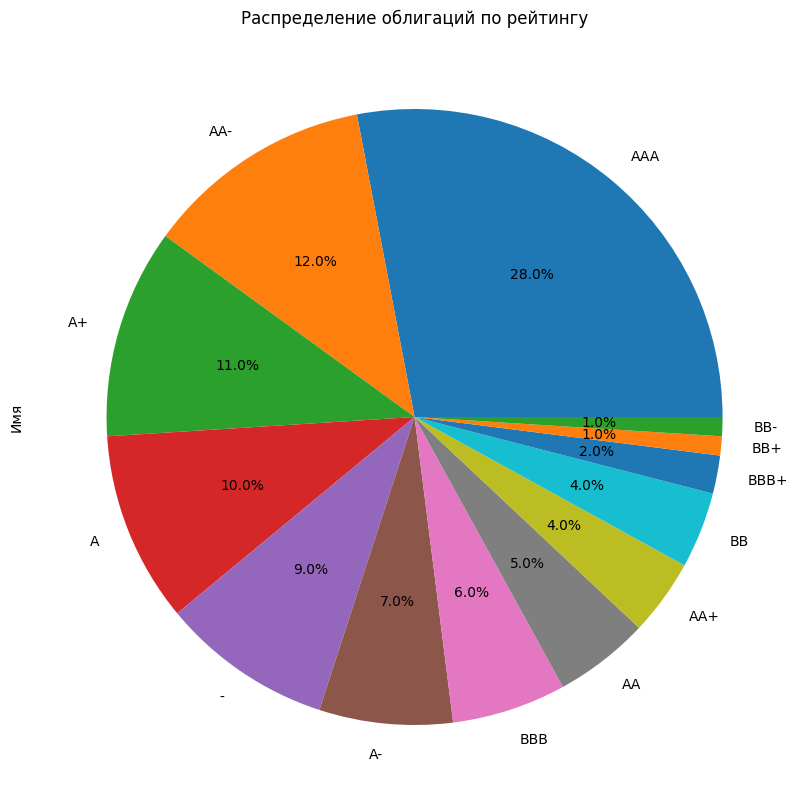

In [ ]:
plt.rcParams["figure.figsize"] = [20, 10]
df1.plot(kind='pie', subplots=True, legend=False, autopct='%1.1f%%')
plt.title('Распределение облигаций по рейтингу')
plt.show()

Вывод:
Наиболее часто встречающиеся классы облигаций - ААА, АА-, АА+ и АА. Эти облигации славятся своей высокой степенью надежности и считаются безопасными финансовыми инструментами. Благодаря такой надежности облигации считаются одними из самых надежных инструментов на рынке. Одновременно с этим, стоит отметить, что доходность таких облигаций, как правило, соответствует банковской процентной ставке. Наоборот, облигации с высокой доходностью часто связаны с повышенным риском дефолта.

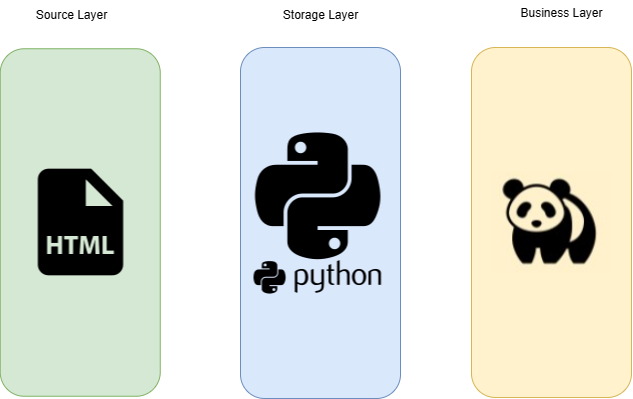

In [1]:
from IPython.display import Image
Image(filename='1234.drawio.png')
